# <h1><center>IT Performance Analysis</center></h1>
## <h1><center>The effect of Data transmission on both Transmitter and Receiver CPU Load</center></h1>

## We made experiment by transmit artificial data between two points with distance of 100m and applied many transmission settings manually over several time periods (each period represent different settings) details of transmission settings can be found in the settings.json file
## We extracted CPU usage and throughput and datetime metrics from transmission points pcap tracefile with tcpstat of 1 second sampling rate

## We are going to do analysis and generate 3 plots from the throughput and 2x cpu load time series data, that are stacked over each and do show a Box-Whisker over time with 10s or 20s datapoints binned together. with vertical lines indicates different settings time periods.

### Installing packages and importing libraries part

In [1]:
# The easiest way to get ggplot2 is to install the whole tidyverse:
install.packages("tidyverse")
install.packages("reshape2")
install.packages("rjson")

Installing package into 'C:/Users/mabda/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mabda\AppData\Local\Temp\RtmpeSCcwk\downloaded_packages


Installing package into 'C:/Users/mabda/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mabda\AppData\Local\Temp\RtmpeSCcwk\downloaded_packages


Installing package into 'C:/Users/mabda/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'rjson' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mabda\AppData\Local\Temp\RtmpeSCcwk\downloaded_packages


In [2]:
library(ggplot2)
library(reshape2)
library(rjson)
library(repr)

### Reading files, Organize, Prepare data and tables part

In [3]:
tx_cpuLoad <- read.csv("Tx_cpu_load.csv", sep = ";")
rx_cpuLoad <- read.csv("Rx_cpu_load.csv", sep = ";")

rx_throughput <- read.csv("Rx_Throughput.csv", sep = ";", header = FALSE)
colnames(rx_throughput) <- c("Timestamp", "Throughput")

tx_cpuLoad
rx_cpuLoad
rx_throughput

date,time,user,nice,system,idle,iowait,irq,softirq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-10-29,17:16:33,0.5,0.0,0.8,96.8,0,0,2.0
2022-10-29,17:16:34,4.2,0.0,1.8,92.5,0,0,1.5
2022-10-29,17:16:35,0.2,0.0,6.0,87.8,0,0,6.0
2022-10-29,17:16:36,2.2,0.2,11.0,82.5,0,0,4.0
2022-10-29,17:16:37,1.0,0.0,6.7,85.9,0,0,6.4
2022-10-29,17:16:38,1.0,0.0,5.8,87.5,0,0,5.8
2022-10-29,17:16:39,0.5,0.0,5.2,87.0,0,0,7.2
2022-10-29,17:16:40,1.0,0.0,5.8,87.0,0,0,6.2
2022-10-29,17:16:41,3.0,0.2,12.5,77.8,0,0,6.5


date,time,user,nice,system,idle,iowait,irq,softirq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-10-29,17:16:32,0.0,0.0,1.0,99.0,0,0.0,0.0
2022-10-29,17:16:33,0.0,0.0,0.0,99.5,0,0.0,0.5
2022-10-29,17:16:34,5.4,0.0,5.9,87.7,0,0.5,0.5
2022-10-29,17:16:35,0.5,0.0,4.5,94.0,0,0.5,0.5
2022-10-29,17:16:36,0.0,0.0,5.0,94.1,0,0.5,0.5
2022-10-29,17:16:37,0.5,0.0,3.6,95.4,0,0.0,0.5
2022-10-29,17:16:38,0.0,0.0,4.5,94.5,0,0.5,0.5
2022-10-29,17:16:39,0.5,0.0,3.0,95.5,0,0.5,0.5
2022-10-29,17:16:40,0.0,0.0,4.5,94.4,0,0.5,0.5


Timestamp,Throughput
<int>,<dbl>
1667056591,10241
1667056592,5626
1667056593,8184
1667056594,478086
1667056595,759284
1667056596,757948
1667056597,758032
1667056598,759439
1667056599,756380


In [4]:
tx_cpuLoad$Timestamp <- as.POSIXct(paste(tx_cpuLoad$date, tx_cpuLoad$time, sep = " "), format = "%Y-%m-%d %H:%M:%S")
rx_cpuLoad$Timestamp <- as.POSIXct(paste(rx_cpuLoad$date, rx_cpuLoad$time, sep = " "), format = "%Y-%m-%d %H:%M:%S")
rx_throughput$Timestamp <- as.POSIXct(rx_throughput$Timestamp, origin = "1970-01-01")

head(tx_cpuLoad)
head(rx_cpuLoad)
head(rx_throughput)

,date,time,user,nice,system,idle,iowait,irq,softirq,Timestamp
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2022-10-29,17:16:33,0.5,0.0,0.8,96.8,0,0,2.0,2022-10-29 17:16:33
2,2022-10-29,17:16:34,4.2,0.0,1.8,92.5,0,0,1.5,2022-10-29 17:16:34
3,2022-10-29,17:16:35,0.2,0.0,6.0,87.8,0,0,6.0,2022-10-29 17:16:35
4,2022-10-29,17:16:36,2.2,0.2,11.0,82.5,0,0,4.0,2022-10-29 17:16:36
5,2022-10-29,17:16:37,1.0,0.0,6.7,85.9,0,0,6.4,2022-10-29 17:16:37
6,2022-10-29,17:16:38,1.0,0.0,5.8,87.5,0,0,5.8,2022-10-29 17:16:38


,date,time,user,nice,system,idle,iowait,irq,softirq,Timestamp
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2022-10-29,17:16:32,0.0,0,1.0,99.0,0,0.0,0.0,2022-10-29 17:16:32
2,2022-10-29,17:16:33,0.0,0,0.0,99.5,0,0.0,0.5,2022-10-29 17:16:33
3,2022-10-29,17:16:34,5.4,0,5.9,87.7,0,0.5,0.5,2022-10-29 17:16:34
4,2022-10-29,17:16:35,0.5,0,4.5,94.0,0,0.5,0.5,2022-10-29 17:16:35
5,2022-10-29,17:16:36,0.0,0,5.0,94.1,0,0.5,0.5,2022-10-29 17:16:36
6,2022-10-29,17:16:37,0.5,0,3.6,95.4,0,0.0,0.5,2022-10-29 17:16:37


,Timestamp,Throughput
,<dttm>,<dbl>
1,2022-10-29 17:16:31,10241
2,2022-10-29 17:16:32,5626
3,2022-10-29 17:16:33,8184
4,2022-10-29 17:16:34,478086
5,2022-10-29 17:16:35,759284
6,2022-10-29 17:16:36,757948


In [5]:
#Merge the 3 tables into PlotData dataset
plotData <- Reduce(function(x, y) merge(x, y, by = "Timestamp", all = TRUE), list(tx_cpuLoad, rx_cpuLoad, rx_throughput))[,c("Timestamp", "idle.x", "idle.y", "Throughput")]
# Take Time difference to show absolute time Values (0,1,2..) instead of Timestamp (2022-10-29 17:16:31, 2022-10-29 17:16:32 ..)
plotData$Timestamp <- as.numeric(difftime(plotData$Timestamp, plotData$Timestamp[1]))
# Renaming Columns 
colnames(plotData) <- c("Elapsed", "SenderCPULoad", "ReceiverCPULoad", "ReceiverThroughput")
# Extract CPU load from all processes 
plotData$SenderCPULoad <- 100 - plotData$SenderCPULoad
plotData$ReceiverCPULoad <- 100 - plotData$ReceiverCPULoad
# converting Bytes to MegaBytes
plotData$ReceiverThroughput <- plotData$ReceiverThroughput / 1000 / 1000
                   
plotData

Elapsed,SenderCPULoad,ReceiverCPULoad,ReceiverThroughput
<dbl>,<dbl>,<dbl>,<dbl>
0,NA,NA,0.010241
1,NA,1.0,0.005626
2,3.2,0.5,0.008184
3,7.5,12.3,0.478086
4,12.2,6.0,0.759284
5,17.5,5.9,0.757948
6,14.1,4.6,0.758032
7,12.5,5.5,0.759439
8,13.0,4.5,0.756380


### Reading JSON file and extract different settings durations information 

In [6]:
# Read the JSON file
settings <- fromJSON(file = "settings.json")
settings

$general
$general$ap_list_dir
[1] "ap_list.csv"

$general$traffic_settings
$general$traffic_settings$server
$general$traffic_settings$server$user
[1] "root"

$general$traffic_settings$server$IP
[1] "10.10.10.33"

$general$traffic_settings$server$ssh_port
[1] 222

$general$traffic_settings$server$password
[1] "''"

$general$traffic_settings$server$options
$general$traffic_settings$server$options$`--bind-dev`
[1] "wl1-mesh0"



$general$traffic_settings$clients
$general$traffic_settings$clients$`1`
$general$traffic_settings$clients$`1`$user
[1] "root"

$general$traffic_settings$clients$`1`$IP
[1] "10.10.10.46"

$general$traffic_settings$clients$`1`$ssh_port
[1] 222

$general$traffic_settings$clients$`1`$password
[1] "''"

$general$traffic_settings$clients$`1`$host
[1] "10.10.10.33"

$general$traffic_settings$clients$`1`$options
$general$traffic_settings$clients$`1`$options$`--bind-dev`
[1] "phy1-mesh0"

$general$traffic_settings$clients$`1`$options$`--json`
[1] ""

$general$traffic_settings$clients$`1`$options$`--bitrate`
[1] "250M"

$general$traffic_settings$clients$`1`$options$`--udp`
[1] ""

$general$traffic_settings$clients$`1`$options$`-Z`
[1] ""






$part1
$part1$iterations
[1] 1

$part1$duration
[1] 20

$part1$rate_control_alg
[1] "manual_mrr_setter"

$part1$rate_control_options
$part1$rate_control_options$multi_rate_retry
[1] "lowest;2"



$part2
$part2$iterations
[1] 1

$part2$duration
[1] 180

$part2$rate_control_alg
[1] "manual_mrr_setter"

$part2$rate_control_options
$part2$rate_control_options$multi_rate_retry
[1] "random,random,random,random;1,1,1,1"



$part3
$part3$iterations
[1] 1

$part3$duration
[1] 20

$part3$rate_control_alg
[1] "manual_mrr_setter"

$part3$rate_control_options
$part3$rate_control_options$multi_rate_retry
[1] "lowest;2"



$part4
$part4$iterations
[1] 1

$part4$duration
[1] 180

$part4$rate_control_alg
[1] "minstrel_ht_kernel_space"


$part5
$part5$iterations
[1] 1

$part5$duration
[1] 20

$part5$rate_control_alg
[1] "manual_mrr_setter"

$part5$rate_control_options
$part5$rate_control_options$multi_rate_retry
[1] "lowest;2"



$part6
$part6$iterations
[1] 1

$part6$duration
[1] 180

$part6$rate_control_alg
[1] "py_minstrel_ht"

$part6$rate_control_options
$part6$rate_control_options$filter
[1] "butterworth"



$part7
$part7$iterations
[1] 1

$part7$duration
[1] 20

$part7$rate_control_alg
[1] "manual_mrr_setter"

$part7$rate_control_options
$part7$rate_control_options$multi_rate_retry
[1] "lowest;2"



$part8
$part8$iterations
[1] 1

$part8$duration
[1] 180

$part8$rate_control_alg
[1] "minstrel_ht_kernel_space"


$part9
$part9$iterations
[1] 1

$part9$duration
[1] 20

$part9$rate_control_alg
[1] "manual_mrr_setter"

$part9$rate_control_options
$part9$rate_control_options$multi_rate_retry
[1] "lowest;2"



$part10
$part10$iterations
[1] 1

$part10$duration
[1] 180

$part10$rate_control_alg
[1] "py_minstrel_ht"

$part10$rate_control_options
$part10$rate_control_options$filter
[1] "EWMA"



$part11
$part11$iterations
[1] 1

$part11$duration
[1] 20

$part11$rate_control_alg
[1] "manual_mrr_setter"

$part11$rate_control_options
$part11$rate_control_options$multi_rate_retry
[1] "lowest;2"



$part12
$part12$iterations
[1] 1

$part12$duration
[1] 180

$part12$rate_control_alg
[1] "minstrel_ht_kernel_space"


$part17
$part17$iterations
[1] 1

$part17$duration
[1] 20

$part17$rate_control_alg
[1] "manual_mrr_setter"

$part17$rate_control_options
$part17$rate_control_options$multi_rate_retry
[1] "lowest;2"



$part18
$part18$iterations
[1] 1

$part18$duration
[1] 180

$part18$rate_control_alg
[1] "py_minstrel_ht"

$part18$rate_control_options
$part18$rate_control_options$filter
[1] "Discounting"

In [7]:
# Create an empty list and a variable for the total duration
durations <- list(0)
total_duration <- 0

# Iterate through all measurement parts and save the durations
for (part in names(settings)) {
  if (startsWith(part, "part")) {
    total_duration <- total_duration + settings[[part]]$duration
    durations <- append(durations, total_duration)
  }
}
durations

[[1]]
[1] 0

[[2]]
[1] 20

[[3]]
[1] 200

[[4]]
[1] 220

[[5]]
[1] 400

[[6]]
[1] 420

[[7]]
[1] 600

[[8]]
[1] 620

[[9]]
[1] 800

[[10]]
[1] 820

[[11]]
[1] 1000

[[12]]
[1] 1020

[[13]]
[1] 1200

[[14]]
[1] 1220

[[15]]
[1] 1400

### Preparing and Reshaping Dataset for plotting

In [8]:
# Binned the datapoints together
nBinnedDatapoints <- 20
plotData$Interval <- as.numeric(cut_width(plotData$Elapsed, nBinnedDatapoints, boundary = 0)) - 1
plotData$Interval <- nBinnedDatapoints * (plotData$Interval + 0.5)

head(plotData)

,Elapsed,SenderCPULoad,ReceiverCPULoad,ReceiverThroughput,Interval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,NA,NA,0.010241,10
2,1,NA,1.0,0.005626,10
3,2,3.2,0.5,0.008184,10
4,3,7.5,12.3,0.478086,10
5,4,12.2,6.0,0.759284,10
6,5,17.5,5.9,0.757948,10


In [9]:
# Reshape the data to stack them in the plot
plotData <- melt(plotData, c("Elapsed", "Interval"))
plotData <- na.omit(plotData)

head(plotData)

,Elapsed,Interval,variable,value
,<dbl>,<dbl>,<fct>,<dbl>
3,2,10,SenderCPULoad,3.2
4,3,10,SenderCPULoad,7.5
5,4,10,SenderCPULoad,12.2
6,5,10,SenderCPULoad,17.5
7,6,10,SenderCPULoad,14.1
8,7,10,SenderCPULoad,12.5


### Plotting Part

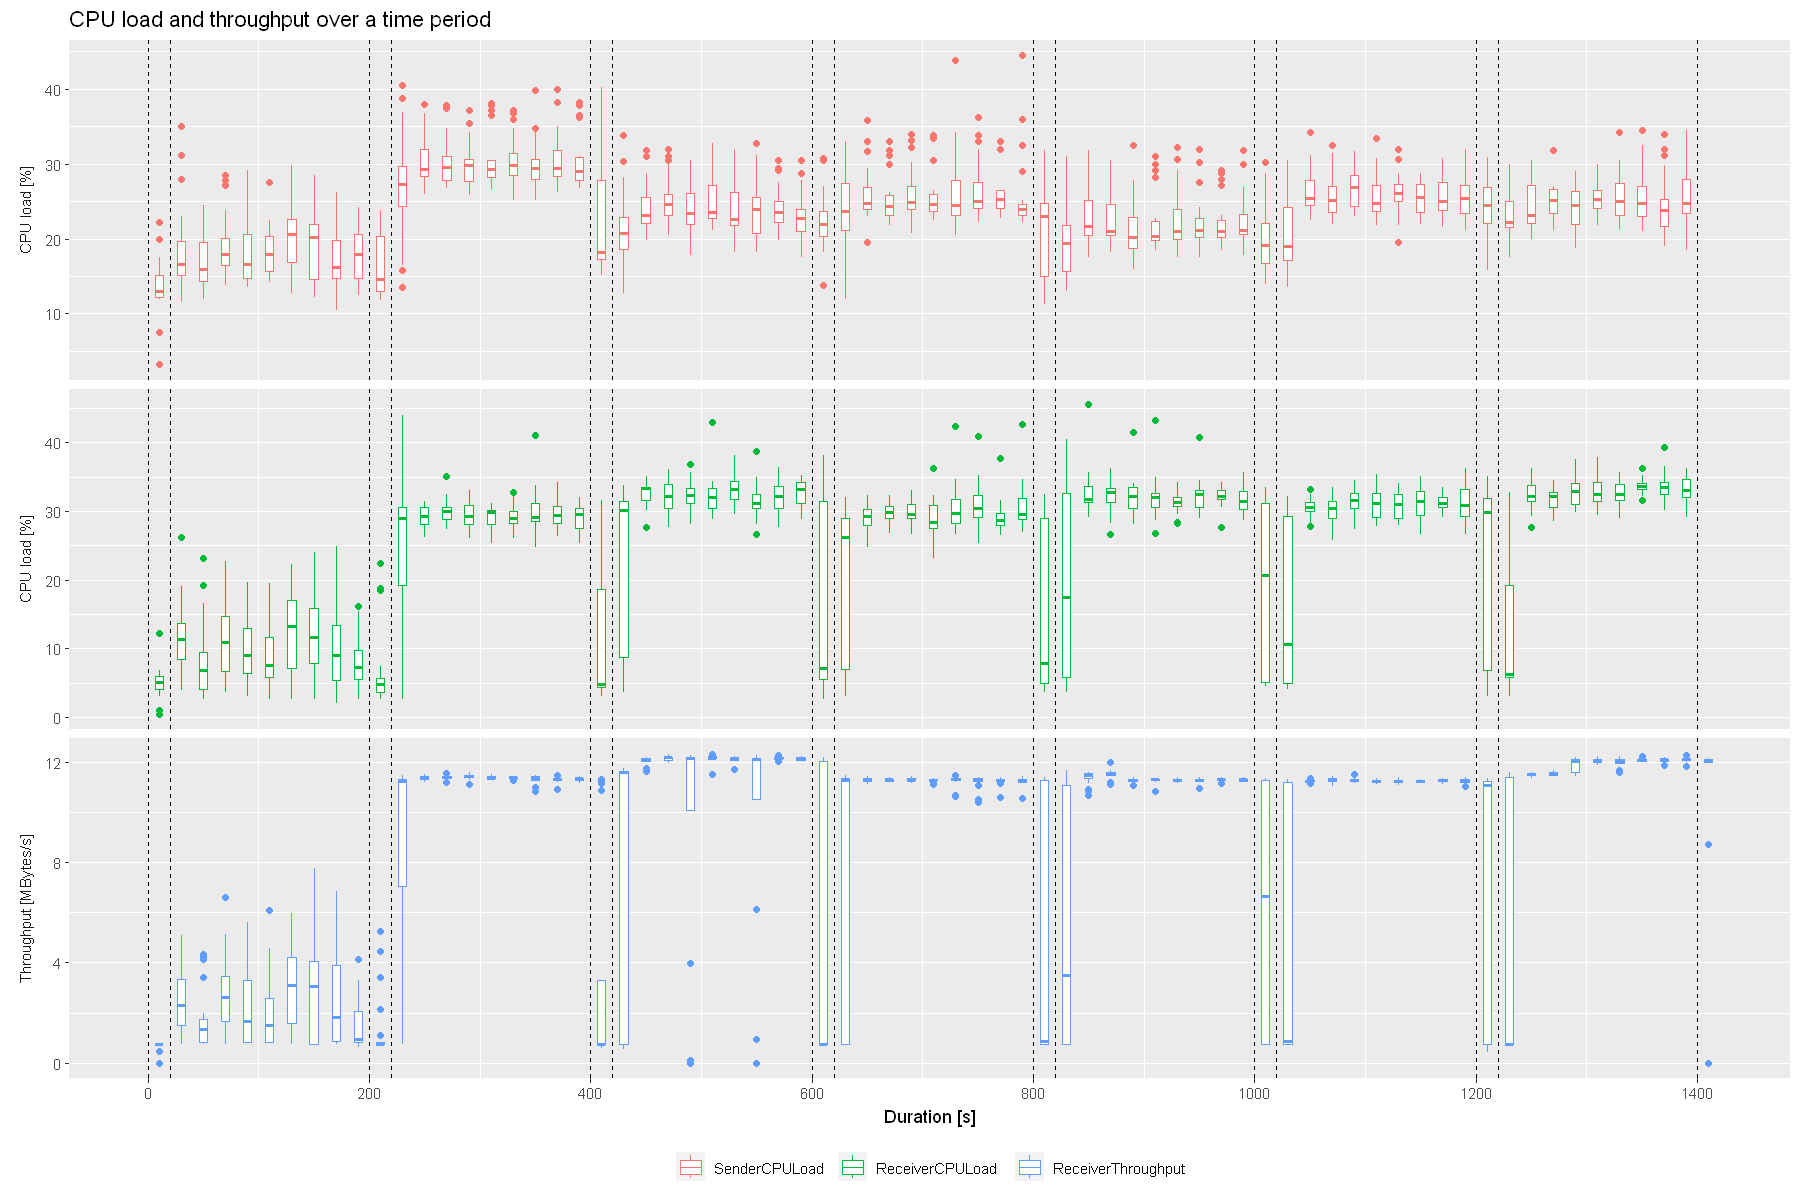

In [10]:
# adjust plot size
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot the data
ggplot(plotData) +
  geom_vline(xintercept = as.numeric(durations), linetype = "dashed", color = "black") + ## Creat Vertical Lines to indicate durations
  geom_boxplot(aes(Interval, value, color = variable, group = Interval)) +
  facet_grid(variable ~ ., scales = "free_y", switch = "y", labeller = as_labeller(c(SenderCPULoad = "CPU load [%]", ReceiverCPULoad = "CPU load [%]", ReceiverThroughput = "Throughput [MBytes/s]"))) +
  scale_x_continuous(n.breaks = 10) + ylab(NULL) +
  ggtitle("CPU load and throughput over a time period") + xlab("Duration [s]") +
  theme(legend.title = element_blank(), legend.position = "bottom", strip.background = element_blank(), strip.placement = "outside")
